In [1]:
# Marek Fudaliński
# Lab1
# PJN

In [21]:
import regex
from os import listdir
from os.path import isfile, join
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
billPath = './bills/'
bills = [f for f in listdir(billPath) if isfile(join(billPath, f))]
len(bills)

1180

In [4]:
firstBill = bills[0]
firstBill

'1993_599.txt'

In [5]:
# # ^.*\b(one|two|three)\b.*$ 
# tmp = 'skreśla\ssię \w+'
# tmp = 'skreśla\ssię\s\w*'
# l = []
# for b in bills:
#     tmp_path = billPath+b
#     f = open(tmp_path, "r",encoding='UTF-8')
#     text = f.read()
#     l.append(regex.findall(tmp,text))
# print(l)

In [6]:
#count in file
def countInSingleBill(billPath):
    f = open(billPath, "r",encoding='UTF-8')
    text = f.read()
    
    #counting unit addition
    #whit spaces
    addition_patterns = "dodaje\ssię\s(pkt|ust\.|art|lit|tytuł|rozdział|poz|dział|tiret)" #pkt ust. zdani(e/a) wyraz(y) | artykuł
    addition_len = len(regex.findall(addition_patterns,text))
    
    #counting unit removal
    removal_patterns = "skreśla\ssię\s(ust\.|pkt|lit|rozdział|dział|poz)" #pkt wyrazy
    removal_len = len(regex.findall(removal_patterns,text))
   
    #counting unit change
    change_patterns = "otrzymuje\sbrzmienie"
    change_len = len(regex.findall(change_patterns,text))
    
    return addition_len, removal_len, change_len

In [7]:
def countInAllBills(pathToBills,bills):
    aLen, rLen, cLen = (0,0,0)
    
    for b in bills:
        a,r,c = countInSingleBill(pathToBills+b)
        aLen += a
        rLen += r
        cLen += c
        
    return aLen, rLen, cLen
    

In [8]:
countInAllBills(billPath,bills)

(5871, 836, 9587)

In [19]:
# Plot results from point 1 showing how the percentage of amendments of a given type changed in the consecutive years.
statsPerYear = {}

for b in bills:
    currentYear = int(str(b[0:4]))
    if currentYear in statsPerYear:
        continue
    statsPerYear[currentYear] = [0,0,0]
    
for b in bills:
    currentYear = int(str(b[0:4]))
    ca,cr,cc = countInSingleBill(billPath + b)
    a,r,c = statsPerYear[currentYear]
    statsPerYear[currentYear] = [a+ca,r+cr,c+cc]
    
statsPerYear  

{1993: [33, 4, 61],
 1994: [93, 20, 168],
 1995: [318, 53, 356],
 1996: [475, 113, 891],
 1997: [636, 170, 1061],
 1998: [209, 55, 300],
 1999: [163, 45, 169],
 2000: [760, 224, 1456],
 2001: [1049, 147, 1344],
 2002: [91, 1, 187],
 2003: [1018, 2, 1887],
 2004: [1026, 2, 1707]}

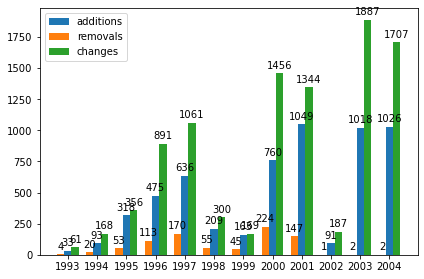

In [33]:
labels = [k for k in statsPerYear]
additions = [statsPerYear[k][0] for k in statsPerYear]
removals = [statsPerYear[k][1] for k in statsPerYear]
changes = [statsPerYear[k][2] for k in statsPerYear]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x , additions, width, label='additions')
rects2 = ax.bar(x - width, removals, width, label='removals')
rects3 = ax.bar(x + width, changes, width, label='changes')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)


fig.tight_layout()

plt.show()
    

In [10]:
# Compute the total number of occurrences of the word ustawa in any inflectional form (ustawa, ustawie, ustawę, etc.) and all spelling forms (ustawa, Ustawa, USTAWA), excluding other words with the same prefix (e.g. ustawić).
ustawa_regex = r"\b(ustaw|ustawom|ustawami|ustawach|ustawa|ustawy|ustawie|ustawę|ustawą|ustawy|ustawo)\b" #25092
# ustawa_regex = r"(ustaw|ustawom|ustawami|ustawach|ustawa|ustawy|ustawie|ustawę|ustawą|ustawy|ustawo)\b" #25095
# ustawa_regex = "ustaw(a|y|ie|ę|ą|o|om|ami|ach|\b)" #24974
ustawa_counter = 0

for b in bills:
    bill = billPath + b
    f = open(bill, "r",encoding='UTF-8')
    text = f.read()
    ustawa_counter += len(regex.findall(ustawa_regex,text,regex.IGNORECASE))
ustawa_counter

    

25092

In [11]:
# Compute the total number of occurrences of the same word (same conditions), followed by z dnia expression.
ustawa_day_regex = r"\b(ustaw|ustawom|ustawami|ustawach|ustawa|ustawy|ustawie|ustawę|ustawą|ustawy|ustawo)\b\sz\sdnia"
ustawa_day_counter = 0

for b in bills:
    bill = billPath + b
    f = open(bill, "r",encoding='UTF-8')
    text = f.read()
    ustawa_day_counter += len(regex.findall(ustawa_day_regex,text,regex.IGNORECASE))
ustawa_day_counter

7567

In [12]:
# As above, but not followed by z dnia expression. Is the result correct (result 4 =? result 5 + result 6)?
ustawa_not_day_regex = r"\b(ustaw|ustawom|ustawami|ustawach|ustawa|ustawy|ustawie|ustawę|ustawą|ustawy|ustawo)\b(?!\sz\sdnia)"
ustawa_not_day_counter = 0

for b in bills:
    bill = billPath + b
    f = open(bill, "r",encoding='UTF-8')
    text = f.read()
    ustawa_not_day_counter += len(regex.findall(ustawa_not_day_regex,text,regex.IGNORECASE))
ustawa_not_day_counter

7567

In [13]:
print(ustawa_counter)
print(ustawa_day_counter + ustawa_not_day_counter)
ustawa_day_counter + ustawa_not_day_counter == ustawa_counter

25092
25092


True

In [14]:
ustawa_not_change_regex = r"\b(ustaw|ustawom|ustawami|ustawach|ustawa|ustawy|ustawie|ustawę|ustawą|ustawy|ustawo)\b(?!\so\szmianie)"
ustawa_not_change_counter = 0

for b in bills:
    bill = billPath + b
    f = open(bill, "r",encoding='UTF-8')
    text = f.read()
    ustawa_not_change_counter += len(regex.findall(ustawa_not_change_regex,text,regex.IGNORECASE))
ustawa_not_change_counter



25061

([<matplotlib.axis.XTick at 0x26b3c9d7080>,
 [Text(0, 0, '4'), Text(0, 0, '5'), Text(0, 0, '6'), Text(0, 0, '7')])

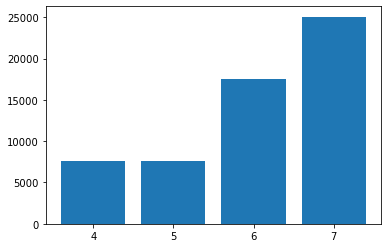

In [36]:
# Plot results 4-7 using a bar chart.
labels = [str(k) for k in range(4,8)]
vals = [ustawa_day_counter,ustawa_day_counter,ustawa_not_day_counter,ustawa_not_change_counter]

x = np.arange(4)
fig, ax = plt.subplots()
plt.bar(x, vals)
plt.xticks(x,labels)
